In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,\
RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import io
df = pd.read_csv('/content/drive/MyDrive/SCDB_Legacy_01_justiceCentered_Citation.csv',encoding = "ISO-8859-1")


In [ ]:
df.shape

(249793, 61)

In [ ]:
df.head(5)

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
0,1791-001,1791-001-01,1791-001-01-01,1791-001-01-01-01-01,8/3/1791,6.0,2 U.S. 401,NaN,1 L. Ed. 433,1791 U.S. LEXIS 189,...,5.0,0.0,1,JJay,1.0,1.0,1.0,2.0,NaN,NaN
1,1791-001,1791-001-01,1791-001-01-01,1791-001-01-01-01-02,8/3/1791,6.0,2 U.S. 401,NaN,1 L. Ed. 433,1791 U.S. LEXIS 189,...,5.0,0.0,3,WCushing,1.0,1.0,1.0,2.0,NaN,NaN
2,1791-001,1791-001-01,1791-001-01-01,1791-001-01-01-01-03,8/3/1791,6.0,2 U.S. 401,NaN,1 L. Ed. 433,1791 U.S. LEXIS 189,...,5.0,0.0,4,JWilson,1.0,1.0,1.0,2.0,NaN,NaN
3,1791-001,1791-001-01,1791-001-01-01,1791-001-01-01-01-04,8/3/1791,6.0,2 U.S. 401,NaN,1 L. Ed. 433,1791 U.S. LEXIS 189,...,5.0,0.0,5,JBlair,1.0,1.0,1.0,2.0,NaN,NaN
4,1791-001,1791-001-01,1791-001-01-01,1791-001-01-01-01-05,8/3/1791,6.0,2 U.S. 401,NaN,1 L. Ed. 433,1791 U.S. LEXIS 189,...,5.0,0.0,6,JIredell,1.0,1.0,1.0,2.0,NaN,NaN


In [ ]:
#Dropping rows or columns with 60% NaN values
perc = 60.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1,
                thresh=min_count)

In [ ]:
#Updated Dataframe shape after dropping rows or columns with 75% NaN values
df.shape

(249793, 50)

In [ ]:

df = df.drop(['decisionType', 'declarationUncon', 'caseDispositionUnusual', 'caseDisposition', 'precedentAlteration'],axis=1)

In [ ]:
#Classifying the columns into Categorial and Numerical Columns
data_numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(data_numeric_cols)
print(len(data_numeric_cols))
data_categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(data_categorical_cols)
print(len(data_categorical_cols))

['term', 'naturalCourt', 'petitioner', 'respondent', 'jurisdiction', 'threeJudgeFdc', 'caseOrigin', 'caseSource', 'lcDisagreement', 'certReason', 'lcDisposition', 'lcDispositionDirection', 'partyWinning', 'voteUnclear', 'issue', 'issueArea', 'decisionDirection', 'decisionDirectionDissent', 'authorityDecision1', 'lawType', 'lawSupp', 'majOpinWriter', 'majOpinAssigner', 'splitVote', 'majVotes', 'minVotes', 'justice', 'vote', 'opinion', 'direction', 'majority']
31
['caseId', 'docketId', 'caseIssuesId', 'voteId', 'dateDecision', 'usCite', 'sctCite', 'ledCite', 'lexisCite', 'chief', 'docket', 'caseName', 'dateArgument', 'justiceName']
14


In [ ]:
df.shape

(249793, 45)

In [ ]:
df=df.drop(data_categorical_cols,axis=1)

In [ ]:
shape = df.shape

# Printing Number of columns
print('Number of columns :', shape[1])

Number of columns : 31


In [ ]:
df.dtypes

term                          int64
naturalCourt                  int64
petitioner                  float64
respondent                  float64
jurisdiction                float64
threeJudgeFdc               float64
caseOrigin                  float64
caseSource                  float64
lcDisagreement              float64
certReason                  float64
lcDisposition               float64
lcDispositionDirection      float64
partyWinning                float64
voteUnclear                 float64
issue                       float64
issueArea                   float64
decisionDirection           float64
decisionDirectionDissent    float64
authorityDecision1          float64
lawType                     float64
lawSupp                     float64
majOpinWriter               float64
majOpinAssigner             float64
splitVote                     int64
majVotes                    float64
minVotes                    float64
justice                       int64
vote                        

In [ ]:
# It will find zero variance features
from dataclasses import dataclass
from sklearn.feature_selection import VarianceThreshold
varthres = VarianceThreshold(threshold=0)
varthres.fit(df)


VarianceThreshold(threshold=0)

In [ ]:
#This will tell us which columns are zero variance, True value indidcates Non-zero variance column, False value indicates Zero Variance Columns
varthres.get_support()
df.columns[varthres.get_support()]

Index(['term', 'naturalCourt', 'petitioner', 'respondent', 'jurisdiction',
       'threeJudgeFdc', 'caseOrigin', 'caseSource', 'lcDisagreement',
       'certReason', 'lcDisposition', 'lcDispositionDirection', 'partyWinning',
       'voteUnclear', 'issue', 'issueArea', 'decisionDirection',
       'decisionDirectionDissent', 'authorityDecision1', 'lawType', 'lawSupp',
       'majOpinWriter', 'majOpinAssigner', 'splitVote', 'majVotes', 'minVotes',
       'justice', 'vote', 'opinion', 'direction', 'majority'],
      dtype='object')

In [ ]:
constant_columns = [column for column in df.columns
                    if column not in df.columns[varthres.get_support()]]

print(len(constant_columns))

0


In [ ]:
# These columns can be dropped
for feature in constant_columns:
  print(feature)

In [ ]:
df=df.drop(constant_columns,axis=1)

In [ ]:
#Updated Dataframe with 36 columns
df.shape

(249793, 31)

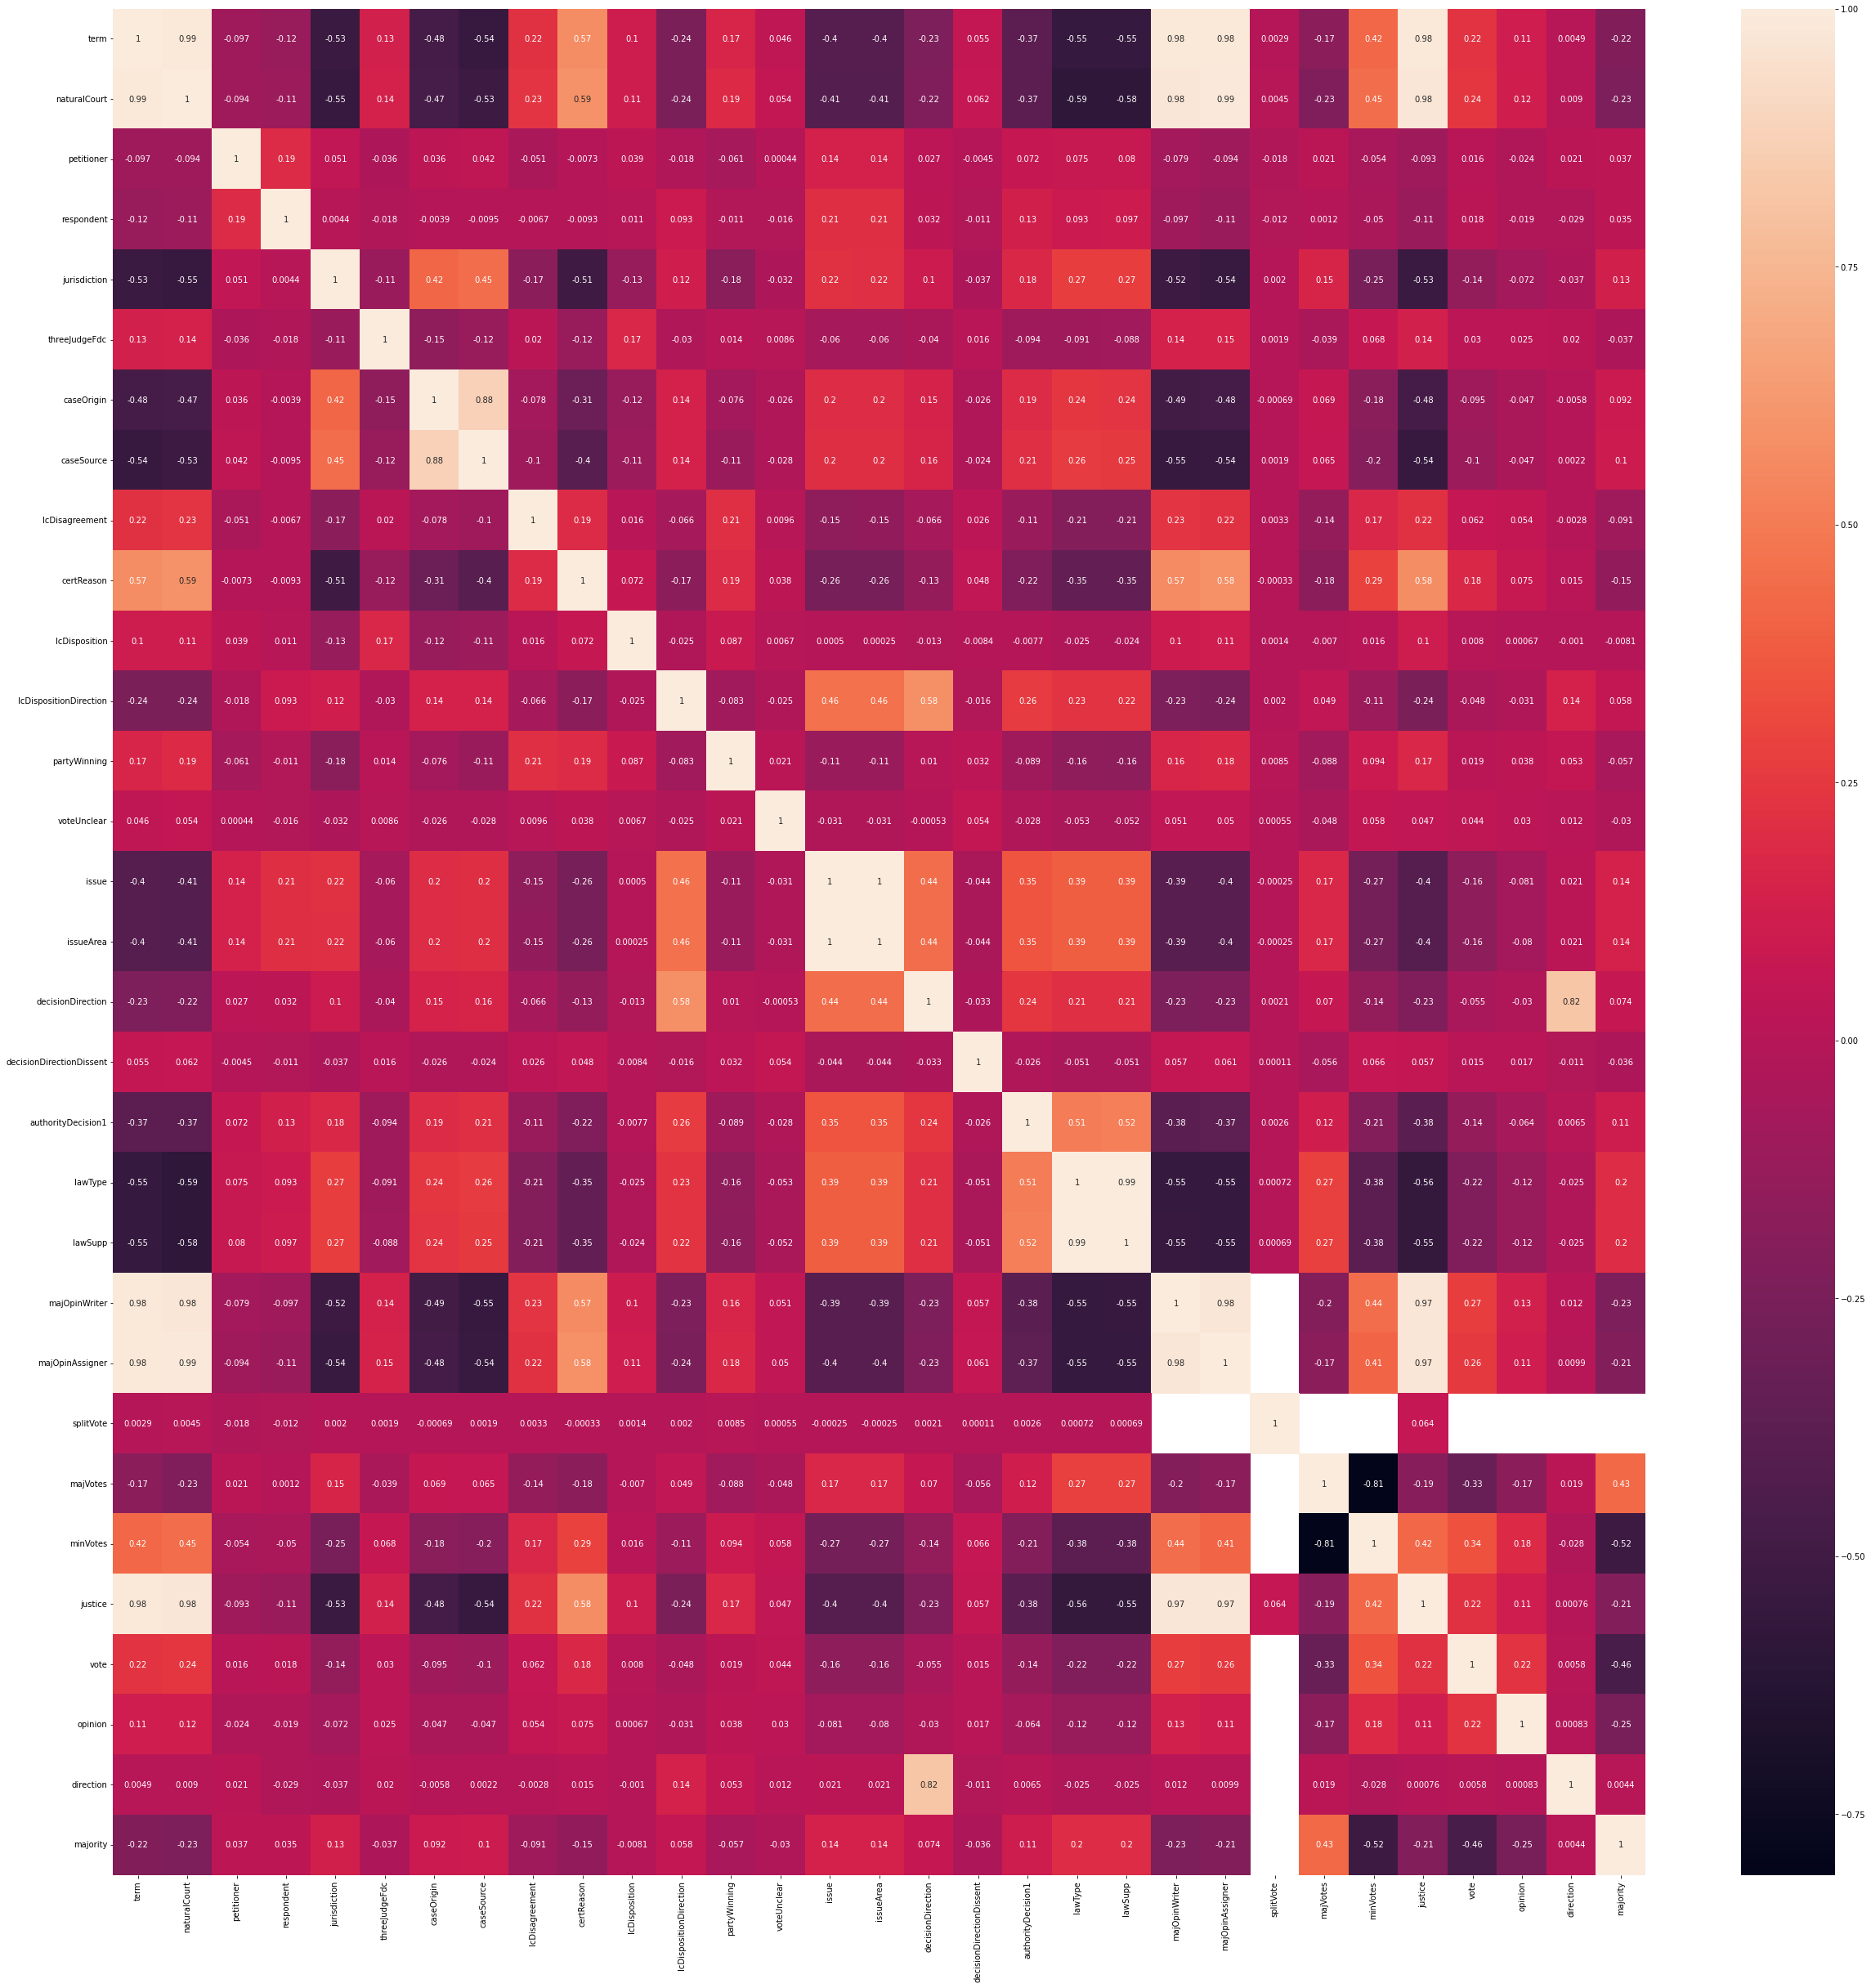

In [ ]:
plt.figure(figsize=(42,42))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#Creating Correlation Matrices

In [ ]:
 #creating a square matrix with dimensions equal to the number of features. In which we will have the elements as the absolute value of correlation between the features.
 cor_matrix = df.corr().abs()
 #Selecting the Upper Triangle Matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
print(to_drop)

['naturalCourt', 'caseSource', 'issueArea', 'lawSupp', 'majOpinWriter', 'majOpinAssigner', 'minVotes', 'justice', 'direction']


In [ ]:
#Dropping columns suggested by Matrix Correlation Matrix
df = df.drop(to_drop, axis=1)

In [ ]:
#Updated Dataframe Shape with 32 Columns
df.shape

(249793, 22)

In [ ]:
df['partyWinning'].unique()

array([ 0.,  1.,  2., nan])

In [ ]:
df.shape

(249793, 22)

In [ ]:
df['partyWinning'].value_counts()

0.0    137919
1.0    105657
2.0      6064
Name: partyWinning, dtype: int64

In [ ]:
df.isnull().sum()

term                             0
petitioner                      17
respondent                      36
jurisdiction                     9
threeJudgeFdc                  577
caseOrigin                    8940
lcDisagreement                 223
certReason                     845
lcDisposition               111022
lcDispositionDirection        9869
partyWinning                   153
voteUnclear                     30
issue                          989
decisionDirection              764
decisionDirectionDissent       881
authorityDecision1             926
lawType                      11910
splitVote                        0
majVotes                        25
vote                          8848
opinion                       8830
majority                     10719
dtype: int64

In [ ]:
#No need of mapping the data of partyWinning Column because it already holds values 0 &1
df.columns


Index(['term', 'petitioner', 'respondent', 'jurisdiction', 'threeJudgeFdc',
       'caseOrigin', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'partyWinning', 'voteUnclear', 'issue',
       'decisionDirection', 'decisionDirectionDissent', 'authorityDecision1',
       'lawType', 'splitVote', 'majVotes', 'vote', 'opinion', 'majority'],
      dtype='object')

In [ ]:
df=df.fillna(-1)

In [ ]:
df.shape

(249793, 22)

In [ ]:
df['partyWinning'].value_counts()

 0.0    137919
 1.0    105657
 2.0      6064
-1.0       153
Name: partyWinning, dtype: int64

In [ ]:
# Creating a dataframe with 50%
# values of original dataframe
df_train = df.sample(frac = 0.6)

# Creating dataframe with
# rest of the 50% values
df_test= df.drop(df_train.index)



In [ ]:
print(df_test.shape,df_train.shape)

(99917, 22) (149876, 22)


In [ ]:
print(df_train.columns,df_test.columns)

Index(['term', 'petitioner', 'respondent', 'jurisdiction', 'threeJudgeFdc',
       'caseOrigin', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'partyWinning', 'voteUnclear', 'issue',
       'decisionDirection', 'decisionDirectionDissent', 'authorityDecision1',
       'lawType', 'splitVote', 'majVotes', 'vote', 'opinion', 'majority'],
      dtype='object') Index(['term', 'petitioner', 'respondent', 'jurisdiction', 'threeJudgeFdc',
       'caseOrigin', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'partyWinning', 'voteUnclear', 'issue',
       'decisionDirection', 'decisionDirectionDissent', 'authorityDecision1',
       'lawType', 'splitVote', 'majVotes', 'vote', 'opinion', 'majority'],
      dtype='object')


In [ ]:
df_train['partyWinning'].value_counts()

 0.0    82848
 1.0    63331
 2.0     3601
-1.0       96
Name: partyWinning, dtype: int64

In [ ]:
df_test['partyWinning'].value_counts()

 0.0    55071
 1.0    42326
 2.0     2463
-1.0       57
Name: partyWinning, dtype: int64

In [ ]:
#Split the dataset into Independent & Dependent features
X=df_train.iloc[:, df_train.columns != 'partyWinning'] #Storing all Independent features except partyWinning
y=df_train.partyWinning #Storing the dependent feature ie. partyWinning

In [ ]:
X.columns

Index(['term', 'petitioner', 'respondent', 'jurisdiction', 'threeJudgeFdc',
       'caseOrigin', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'voteUnclear', 'issue', 'decisionDirection',
       'decisionDirectionDissent', 'authorityDecision1', 'lawType',
       'splitVote', 'majVotes', 'vote', 'opinion', 'majority'],
      dtype='object')

In [ ]:
#Split the dataset into Independent & Dependent features
X_val=df_test.iloc[:, df_test.columns != 'partyWinning'] #Storing all Independent features except partyWinning
y_val=df_test.partyWinning #Storing the dependent feature ie. partyWinning

In [ ]:
#Split the dataset into Independent & Dependent features
Xall=df.iloc[:, df.columns != 'partyWinning'] #Storing all Independent features except partyWinning
yall=df.partyWinning #Storing the dependent feature ie. partyWinning

In [ ]:
y_val.value_counts()

 0.0    55071
 1.0    42326
 2.0     2463
-1.0       57
Name: partyWinning, dtype: int64

In [ ]:
print(X.columns,X.shape)

Index(['term', 'petitioner', 'respondent', 'jurisdiction', 'threeJudgeFdc',
       'caseOrigin', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'voteUnclear', 'issue', 'decisionDirection',
       'decisionDirectionDissent', 'authorityDecision1', 'lawType',
       'splitVote', 'majVotes', 'vote', 'opinion', 'majority'],
      dtype='object') (149876, 21)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    Xall,yall, test_size=0.25, random_state=42)

In [ ]:
y_train.value_counts()

 0.0    103263
 1.0     79337
 2.0      4629
-1.0       115
Name: partyWinning, dtype: int64

In [ ]:
y_test.value_counts()

 0.0    34656
 1.0    26320
 2.0     1435
-1.0       38
Name: partyWinning, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 26,max_depth=57 ,random_state = 42)
rf.fit(X_train, y_train);

In [ ]:
predictionsrf = rf.predict(X_test)
print(pd.value_counts(predictionsrf))
print(classification_report(y_test,predictionsrf))

 0.0    34646
 1.0    26331
 2.0     1431
-1.0       41
dtype: int64
              precision    recall  f1-score   support

        -1.0       0.90      0.97      0.94        38
         0.0       1.00      1.00      1.00     34656
         1.0       1.00      1.00      1.00     26320
         2.0       0.99      0.98      0.98      1435

    accuracy                           1.00     62449
   macro avg       0.97      0.99      0.98     62449
weighted avg       1.00      1.00      1.00     62449



In [ ]:
predictionsrf = rf.predict(X_val)
print(pd.value_counts(predictionsrf))

print(classification_report(y_val,predictionsrf))

 0.0    55083
 1.0    42317
 2.0     2458
-1.0       59
dtype: int64
              precision    recall  f1-score   support

        -1.0       0.97      1.00      0.98        57
         0.0       1.00      1.00      1.00     55071
         1.0       1.00      1.00      1.00     42326
         2.0       0.99      0.99      0.99      2463

    accuracy                           1.00     99917
   macro avg       0.99      1.00      0.99     99917
weighted avg       1.00      1.00      1.00     99917



In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/2022scdbclear.csv')

In [ ]:
df2.columns

Index(['Unnamed: 0', 'term', 'petitioner', 'respondent', 'jurisdiction',
       'threeJudgeFdc', 'caseOrigin', 'lcDisagreement', 'certReason',
       'lcDisposition', 'lcDispositionDirection', 'caseDisposition',
       'voteUnclear', 'issue', 'decisionDirection', 'decisionDirectionDissent',
       'authorityDecision1', 'lawType', 'majVotes', 'vote', 'opinion',
       'direction', 'majority'],
      dtype='object')

In [ ]:
df2=df2.drop(['Unnamed: 0'],axis=1)
df2=df2[df2['term']>2014]
df2['term'].value_counts()

2017    684
2015    666
2018    657
2016    596
2020    585
2019    540
Name: term, dtype: int64

In [ ]:
#Split the dataset into Independent & Dependent features
X2=df2.iloc[:, df2.columns != 'partyWinning'] #Storing all Independent features except partyWinning
y2=df2.partyWinning #Storing the dependent feature ie. partyWinning

AttributeError: ignored

In [ ]:
predictionsrf = rf.predict(X2)
print(pd.value_counts(predictionsrf))
print(classification_report(y2,predictionsrf))

 2.0     1407
 4.0     1228
 5.0      521
 3.0      501
-1.0       48
 9.0       14
 10.0       9
dtype: int64
              precision    recall  f1-score   support

        -1.0       0.27      0.72      0.39        18
         2.0       0.69      0.95      0.80      1021
         3.0       0.15      0.22      0.18       325
         4.0       0.56      0.53      0.54      1294
         5.0       0.40      0.23      0.29       910
         6.0       0.00      0.00      0.00         9
         7.0       0.00      0.00      0.00        53
         9.0       0.00      0.00      0.00        89
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         9

    accuracy                           0.52      3728
   macro avg       0.21      0.27      0.22      3728
weighted avg       0.49      0.52      0.50      3728



In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression().fit(X_train, y_train)
predictionsrf = classifier.predict(X2)
print(pd.value_counts(predictionsrf))
print(classification_report(y2,predictionsrf))

2.0    3728
dtype: int64
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        18
         2.0       0.27      1.00      0.43      1021
         3.0       0.00      0.00      0.00       325
         4.0       0.00      0.00      0.00      1294
         5.0       0.00      0.00      0.00       910
         6.0       0.00      0.00      0.00         9
         7.0       0.00      0.00      0.00        53
         9.0       0.00      0.00      0.00        89
        11.0       0.00      0.00      0.00         9

    accuracy                           0.27      3728
   macro avg       0.03      0.11      0.05      3728
weighted avg       0.08      0.27      0.12      3728



In [ ]:
df.head()

,term,petitioner,respondent,jurisdiction,threeJudgeFdc,caseOrigin,lcDisagreement,certReason,lcDisposition,lcDispositionDirection,...,issue,decisionDirection,decisionDirectionDissent,authorityDecision1,lawType,splitVote,majVotes,vote,opinion,majority
0,1791,501.0,111.0,13.0,0.0,431.0,0.0,1.0,-1.0,1.0,...,90320.0,1.0,0.0,3.0,4.0,1,5.0,1.0,1.0,2.0
1,1791,501.0,111.0,13.0,0.0,431.0,0.0,1.0,-1.0,1.0,...,90320.0,1.0,0.0,3.0,4.0,1,5.0,1.0,1.0,2.0
2,1791,501.0,111.0,13.0,0.0,431.0,0.0,1.0,-1.0,1.0,...,90320.0,1.0,0.0,3.0,4.0,1,5.0,1.0,1.0,2.0
3,1791,501.0,111.0,13.0,0.0,431.0,0.0,1.0,-1.0,1.0,...,90320.0,1.0,0.0,3.0,4.0,1,5.0,1.0,1.0,2.0
4,1791,501.0,111.0,13.0,0.0,431.0,0.0,1.0,-1.0,1.0,...,90320.0,1.0,0.0,3.0,4.0,1,5.0,1.0,1.0,2.0


In [ ]:
raw_data=df.copy()
feature_df=df.copy()
feature_df=feature_df.drop(['partyWinning','vote'],axis=1)
raw_data.shape
feature_df.columns

Index(['term', 'petitioner', 'respondent', 'jurisdiction', 'threeJudgeFdc',
       'caseOrigin', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'voteUnclear', 'issue', 'decisionDirection',
       'decisionDirectionDissent', 'authorityDecision1', 'lawType',
       'splitVote', 'majVotes', 'opinion', 'majority'],
      dtype='object')

In [ ]:
raw_data.isnull().sum()

term                        0
petitioner                  0
respondent                  0
jurisdiction                0
threeJudgeFdc               0
caseOrigin                  0
lcDisagreement              0
certReason                  0
lcDisposition               0
lcDispositionDirection      0
partyWinning                0
voteUnclear                 0
issue                       0
decisionDirection           0
decisionDirectionDissent    0
authorityDecision1          0
lawType                     0
splitVote                   0
majVotes                    0
vote                        0
opinion                     0
majority                    0
dtype: int64

In [ ]:
term_range = range(raw_data["term"].min() + 45,
                   raw_data["term"].max() + 1)
count=0

for term in term_range:
  count=count+1
  train_index = (raw_data.loc[:, "term"] < term).values
  test_index = (raw_data.loc[:, "term"] == term).values
  if test_index.sum() == 0:
        continue
  feature_data_train = feature_df.loc[train_index, :]
  target_data_train = (raw_data.loc[train_index, "partyWinning"]).astype(int)
  feature_data_test = feature_df.loc[test_index, :]
  target_data_test = (raw_data.loc[test_index, "partyWinning"]).astype(int)
  rf = RandomForestClassifier(n_estimators = 15,max_depth=15 ,random_state = 42)
  rf.fit(feature_data_train, target_data_train);
  raw_data.loc[test_index, "rf_predicted"] = rf.predict(feature_data_test)
  print(term)




1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014


In [ ]:
evaluation_index = raw_data.loc[:, "term"].isin(term_range)
target_actual = (raw_data.loc[evaluation_index, "partyWinning"]).astype(int)
target_predicted = raw_data.loc[evaluation_index, "rf_predicted"].astype(int)

In [ ]:
print(classification_report(target_actual, target_predicted))


              precision    recall  f1-score   support

          -1       0.63      0.59      0.61       153
           0       0.90      0.95      0.93    133366
           1       0.93      0.87      0.90    102365
           2       0.88      0.88      0.88      5212

    accuracy                           0.92    241096
   macro avg       0.84      0.82      0.83    241096
weighted avg       0.92      0.92      0.91    241096

